# Final Capstone Project:
## Singapore Sign (SgSL) Language Recognition through Computer Vision

---
# Contents

**[1. Imports, Setup](#1.-Imports,-Setup)**<br>
[1.1 Libraries](#1.1-Libraries)<br>
[1.2 Mounting Google Drive](#1.2-Mounting-Google-Drive)<br>

**[2. Data Preparation](#2.-Data-Preparation)**<br>
[2.1 Specify dataset paths](#2.1-Specify-dataset-paths)<br>
[2.2 Inspect contents of yaml file](#2.2-Inspect-contents-of-yaml-file)<br>

**[3. Modelling](#3.-Modelling)**<br>
[3.1 Model Training](#3.1-Model-Training)<br>
[3.2 Validate Trained Model](#3.2-Validate-Trained-Model)<br>
[3.3 Inferencing with trained weights](#3.3-Inferencing-with-trained-weights)<br>

**[4. Summary of Model Performance](#4.-Summary-of-Model-Performance)**<br>

**[5. Conclusion](#5.-Conclusion)**<br>
[5.1 Summary](#5.1-Summary)<br>
[5.2 Limitations and Recommendations](#5.2-Limitations-and-Recommendations)<br>

---
# Recap - Problem Statement

* In light of the above context, you have been engaged by Instagram, who seeks to advocate for improved inclusivity by enabling HOH community to create and share content equally effortlessly. Instagram is keen to build upon their existing framework of real-time voice-based caption generation - through the development of a new feature enabling automatic generation of text subtitles from live video signing. This would contribute to many use-case scenarios within Social Media and Communication Technology such as instagram reels functions, real-time captions during video calls, etc.

* To address this challenge, your objective is to explore a series of computer vision deep learning models that can perform recognition of Singapore Sign Language (SgSL).

### Capstone Focus
* As a Proof-of-Concept (POC), the focus of this capstone is on `PART 1 - ALPHABET CLASSIFICATION`. <br>The aim is To experiment with several deep learning methods for sign recognition at the alphabet level
    * `Notebook 1:` Problem Statement, Exploratory Data Analysis (EDA)
    * `Notebook 2:` Explore various transfer learning models to find the optimal image classification model that can effectively classify the 26 SGSL signs for letters in the alphabet.
    * `Notebook 3:` Explore object detection through YOLOv8, a state-of-the-art (SOTA) model
 
---

# Modelling - Object Detection

In this notebook 03, we will be exploring object detection.
* Object detection involves both object localization and then classification. Our model will need to recognise the bounding box which denotes the location of hand doing the signing, and then classify the handsign into the correct alphabet class.<br>
The model would also be able to locate and classify multiple handsigns, if there are multiple hands in the images.
* For this notebook, we are mainly looking at single-shot object detection, and we will mainly explore the You Only Look Once (YOLO) model.
* Do note that this notebook was adapted from Roboflow x Ultralytics guide on how to [Train a YOLOv8 Object Detector on a Custom Dataset](https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb).
* We have also tested YOLOv5 earlier on a different notebook. However, due to poorer training scores, we will mainly be focusing on YOLOv8 as our proof-of-concept model.

## You Only Look Once (YOLO)

* YOLO, which stands for "You Only Look Once," is a popular and influential real-time object detection and localization algorithm in computer vision and deep learning. Developed by Joseph Redmon and team, YOLO is known for its speed and accuracy in detecting objects within images and videos.
* Compared to other models like sliding window and region proposal-based techniques, YOLO models treat detection as a regression problem. The system resizes the input image, runs a single convolutional network on the image, and then thresholds the resulting detections by the model’s confidence.<br>

<img src="../images/YOLO-detectn.jpg" alt="drawing" width="700"/>

*Yolo Detection Technique ([source](https://arxiv.org/pdf/1506.02640.pdf))* <br>

<img src="../images/YOLO-network-architecture.png" alt="drawing" width="700"/>

*Yolo Architecture ([source](https://arxiv.org/pdf/1506.02640.pdf))*



## YOLOv8

* YOLOv8 was launched on January 10th, 2023, and has proven to have better accuracy than previous YOLO models.

<img src="../images/yolo comparison.jpg" alt="drawing" width="700"/>

*Comparison of the recent YOLO versions ([source](https://github.com/ultralytics/ultralytics))* <br>

<br>

* One of the new features of YOLOv8 is its anchor free detection approach - the model directly predicts the center of an object instead of the offset from a known anchor box. The advantage of anchor-free detection is that it is more flexible and efficient, as it does not require the manual specification of anchor boxes, which can be difficult to choose and can lead to suboptimal results.


<img src="../images/anchor_box_YOLO.png" alt="drawing" width="300"/>

*Comparison of the recent YOLO versions ([source](https://github.com/ultralytics/ultralytics))* <br>

<br>

* From the YOLOv8 README, we can see the accuracy of the model on the COCO dataset. YOLOv8 Nano is the smallest and the fastest while the YOLOv8x is the most accurate and slowest among the other YOLOv8 models. These models can all be used to train, val, predict and export models for the most common tasks in vision AI: [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/).

* For our project, we will try out the `YOLOv8s` because we favour a smaller but less computationally extensive model, as we are ultimately going to deploy this model for mobile devices.

<img src="../images/YOLOv8_COCO.png" alt="drawing" width="700"/>

*YOLOv8 COCO Evaluation ([source](https://github.com/ultralytics/ultralytics))* <br>

---

# 1. Imports, Setup

## 1.1 Libraries

Import Relevant Libraries and Dependencies:<br>
(Do carry out pip install of ultralytics and tqdm at the start of a new run session)

In [55]:
#!pip install ultralytics==8.0.20
#!pip install tqdm --upgrade
import os
import shutil
import random
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib.image import imread
from IPython.display import Image, display
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


## 1.2 Mounting Google Drive
This notebook was ran on google colab (for its free gpu resources) and the entire folder setup can be accessed here:<br> [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1KdEk9WjID6FYUaKXZezHfbh-KKdr-5jg?usp=sharing)

Connecting to google drive:

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

# 2. Data Preparation

* For object detection, labelling images in the dataset is the first part of the process. There are several open source platforms that can be used, such as Labelimg, and Roboflow.For YOLOv8, ultralytics has partnered with Roboflow to be a recommended annotation and export tool for use in YOLOv8, hence we will do our hand labelling on Roboflow.
* On the platform, we carry out labelling, train-test-split, preprocessing to our model-compatible size of 640x640, and image augmentation. Post-augmentation, we have 630 images for our training set, and 52 for validation.
 
<img src="../images/Roboflow_labelling_1.jpg" alt="drawing" width="700"/>


<br>

## 2.1 Specify dataset paths

In [20]:
train_path_img = "/data/train/images"
train_path_label = "/data/train/labels"
val_path_img = "/data/valid/images"
val_path_label = "/data/valid/labels"
test_path = "/data/test"

## 2.2 Inspect contents of yaml file

In [21]:
# Specify the path to the data.yaml file
data_yaml_path = "/content/drive/MyDrive/Colab/YOLOv8_object_detection/data.yaml"

# Read and print the contents of the data.yaml file
with open(data_yaml_path, 'r') as file:
    data_yaml_contents = file.read()

print(data_yaml_contents)

train: /content/drive/MyDrive/Colab/YOLOv8_object_detection/data/train/images
val: /content/drive/MyDrive/Colab/YOLOv8_object_detection/data/valid/images

nc: 26
names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

roboflow:
  workspace: capstone-emvey
  project: sgsl-sign-language-detector-2
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/capstone-emvey/sgsl-sign-language-detector-2/dataset/2


---

# 3. Modelling
## 3.1 Model Training

Here, we are able to pass a number of arguments:

- **task:** `detect` for object detection
- **imgsz:** `640`
- **epochs:** `50`
- **project:** We specify the folder for where we want the results to be saved.

In [3]:
from ultralytics import YOLO
from IPython.display import display, Image

Let's train the model on our dataset for 50 epochs:

In [25]:
# train yolov8s on custom data for 50 epochs
# time its performance
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/Colab/YOLOv8_object_detection/data.yaml epochs=50 imgsz=640 project=/content/drive/MyDrive/Colab/YOLOv8_object_detection/training_results name=signlanguage plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/Colab/YOLOv8_object_detection/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=/content/drive/MyDrive/Colab/YOLOv8_object_detection/training_results, name=signlanguage, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

Let's print the outputs of our training:

In [26]:
# Specify the directory path
directory_path = '/content/drive/MyDrive/Colab/YOLOv8_object_detection/training_results/signlanguage'

# List the contents of the directory
contents = os.listdir(directory_path)

# Print the list of contents
for item in contents:
    print(item)

weights
args.yaml
events.out.tfevents.1693928015.49b68b91c9fe.8479.0
results.csv
val_batch0_labels.jpg
val_batch0_pred.jpg
val_batch1_labels.jpg
val_batch1_pred.jpg
PR_curve.png
F1_curve.png
P_curve.png
R_curve.png
confusion_matrix.png


## 3.2 Validate Trained Model

By using `mode=val`, we can validate our trained model (with best weights):

In [22]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Colab/YOLOv8_object_detection/training_results/signlanguage/weights/best.pt data=/content/drive/MyDrive/Colab/YOLOv8_object_detection/data.yaml

2023-09-07 02:31:19.704077: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-07 02:31:20.541124: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs
100% 755k/755k [00:00<00:00, 26.2MB/s]
val: Scanning /content/drive/MyDrive/Colab/YOLOv8_object_detection/data/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100% 52/52 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:11<00:00,  2.96s/it]
                   all         52         52      0.896      0.656      0.

### Findings
* We can see that the model was able to perform object detection on our images, and classify the alphabets effectively.
* Within this small sample alone, we can see that all alphabets were accurately classified with above 0.7 probability.

---
let's display the confusion matrix output from the model:

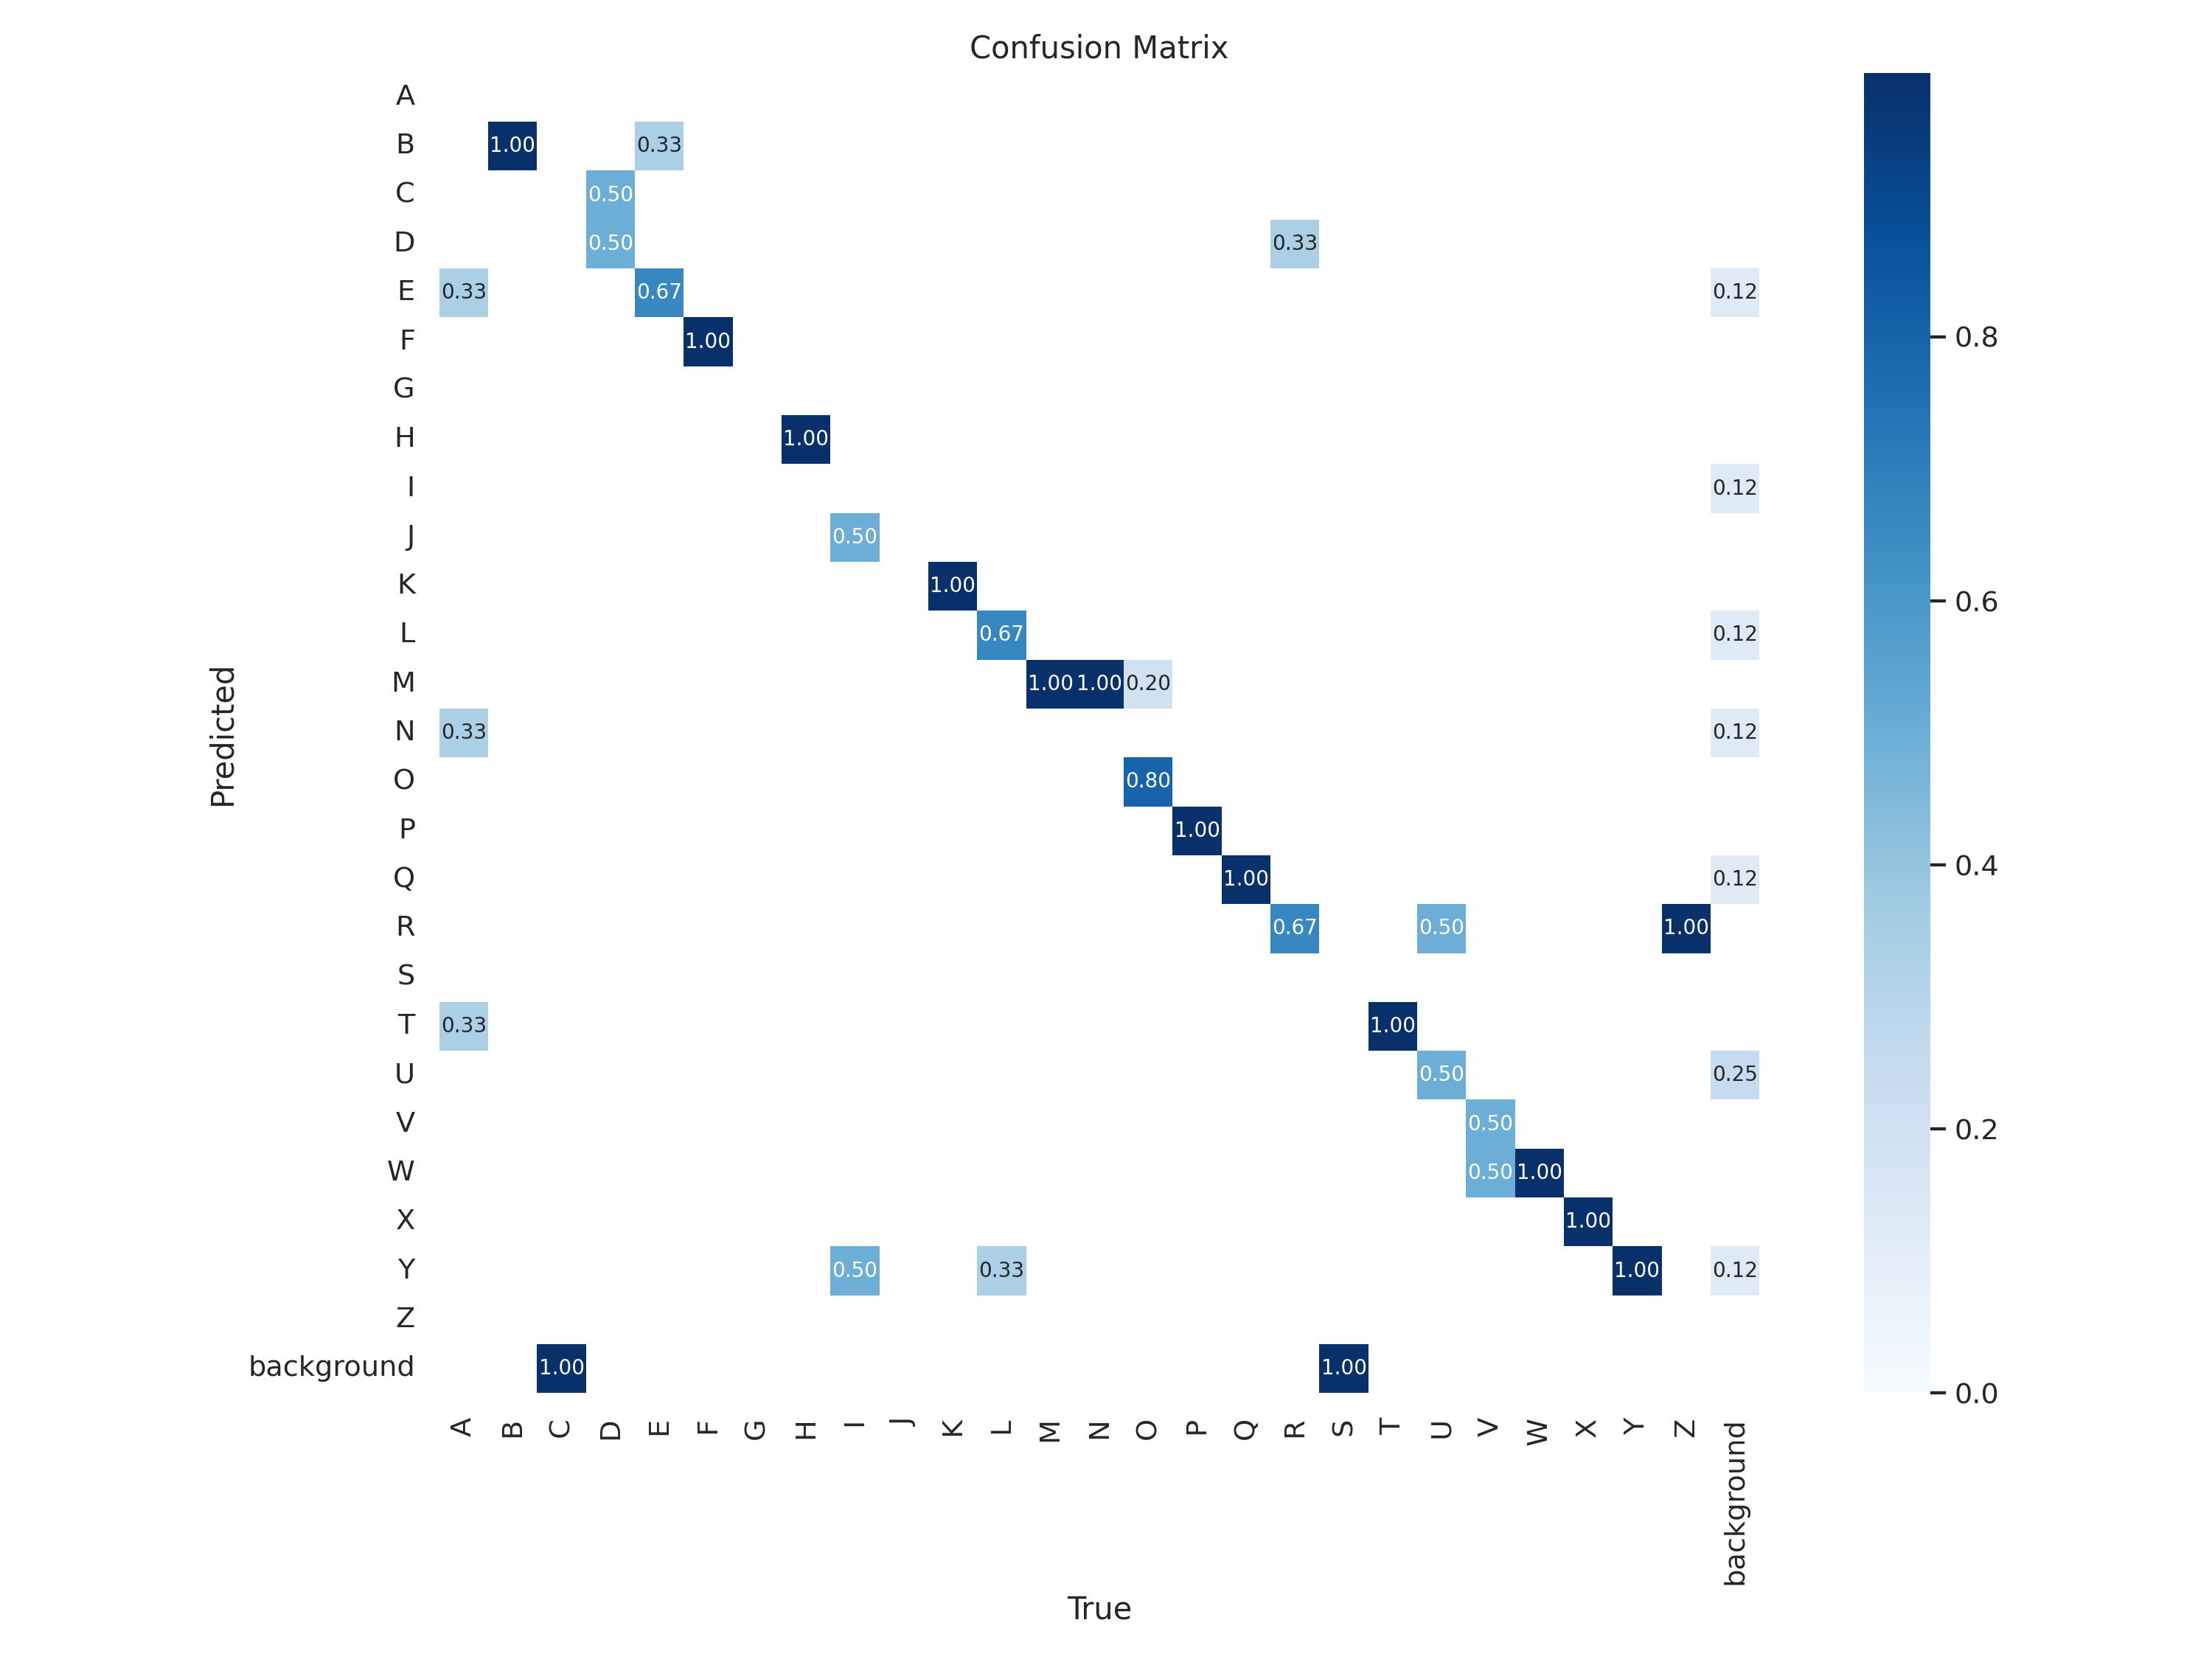

In [59]:
# Display the confusion matrix image
confusion_matrix_path = '/content/drive/MyDrive/Colab/YOLOv8_object_detection/training_results/signlanguage/confusion_matrix.png'
display(Image(filename=confusion_matrix_path))

Let's display the precision-recall curve:

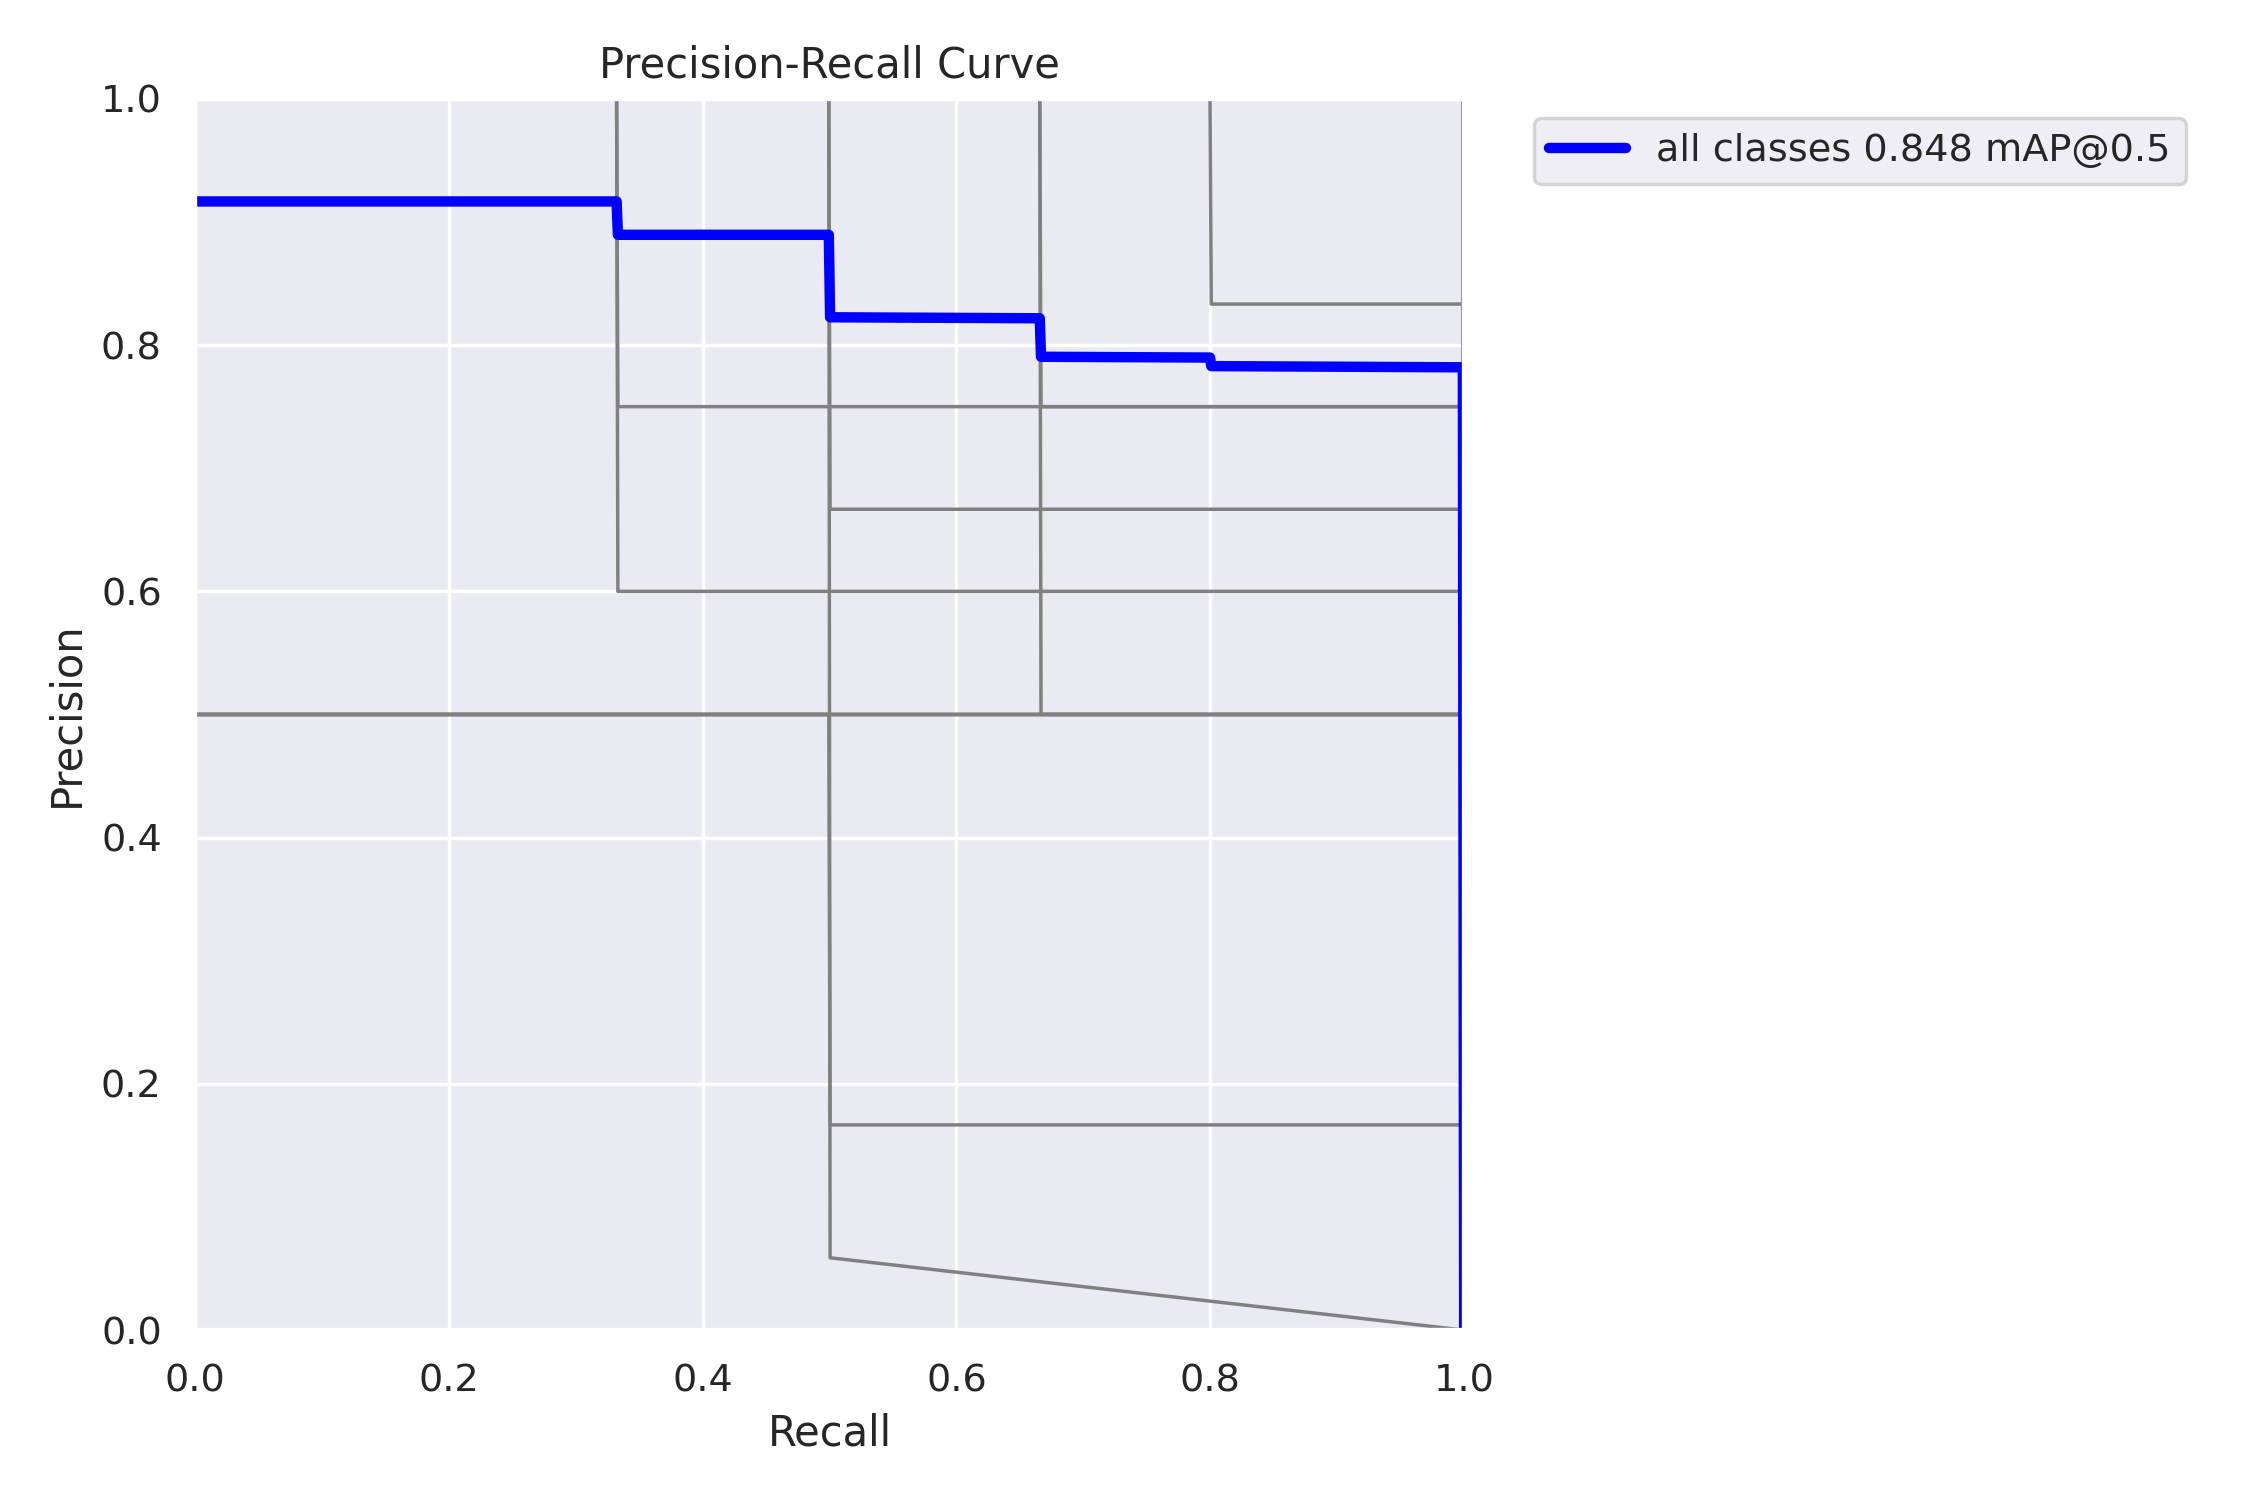

In [ ]:
from IPython.display import Image, display
precision_recall_curve = '/content/drive/MyDrive/Colab/YOLOv8_object_detection/training_results/signlanguage/PR_curve.png'
display(Image(filename=precision_recall_curve))

Let's view the plots of our metrics:

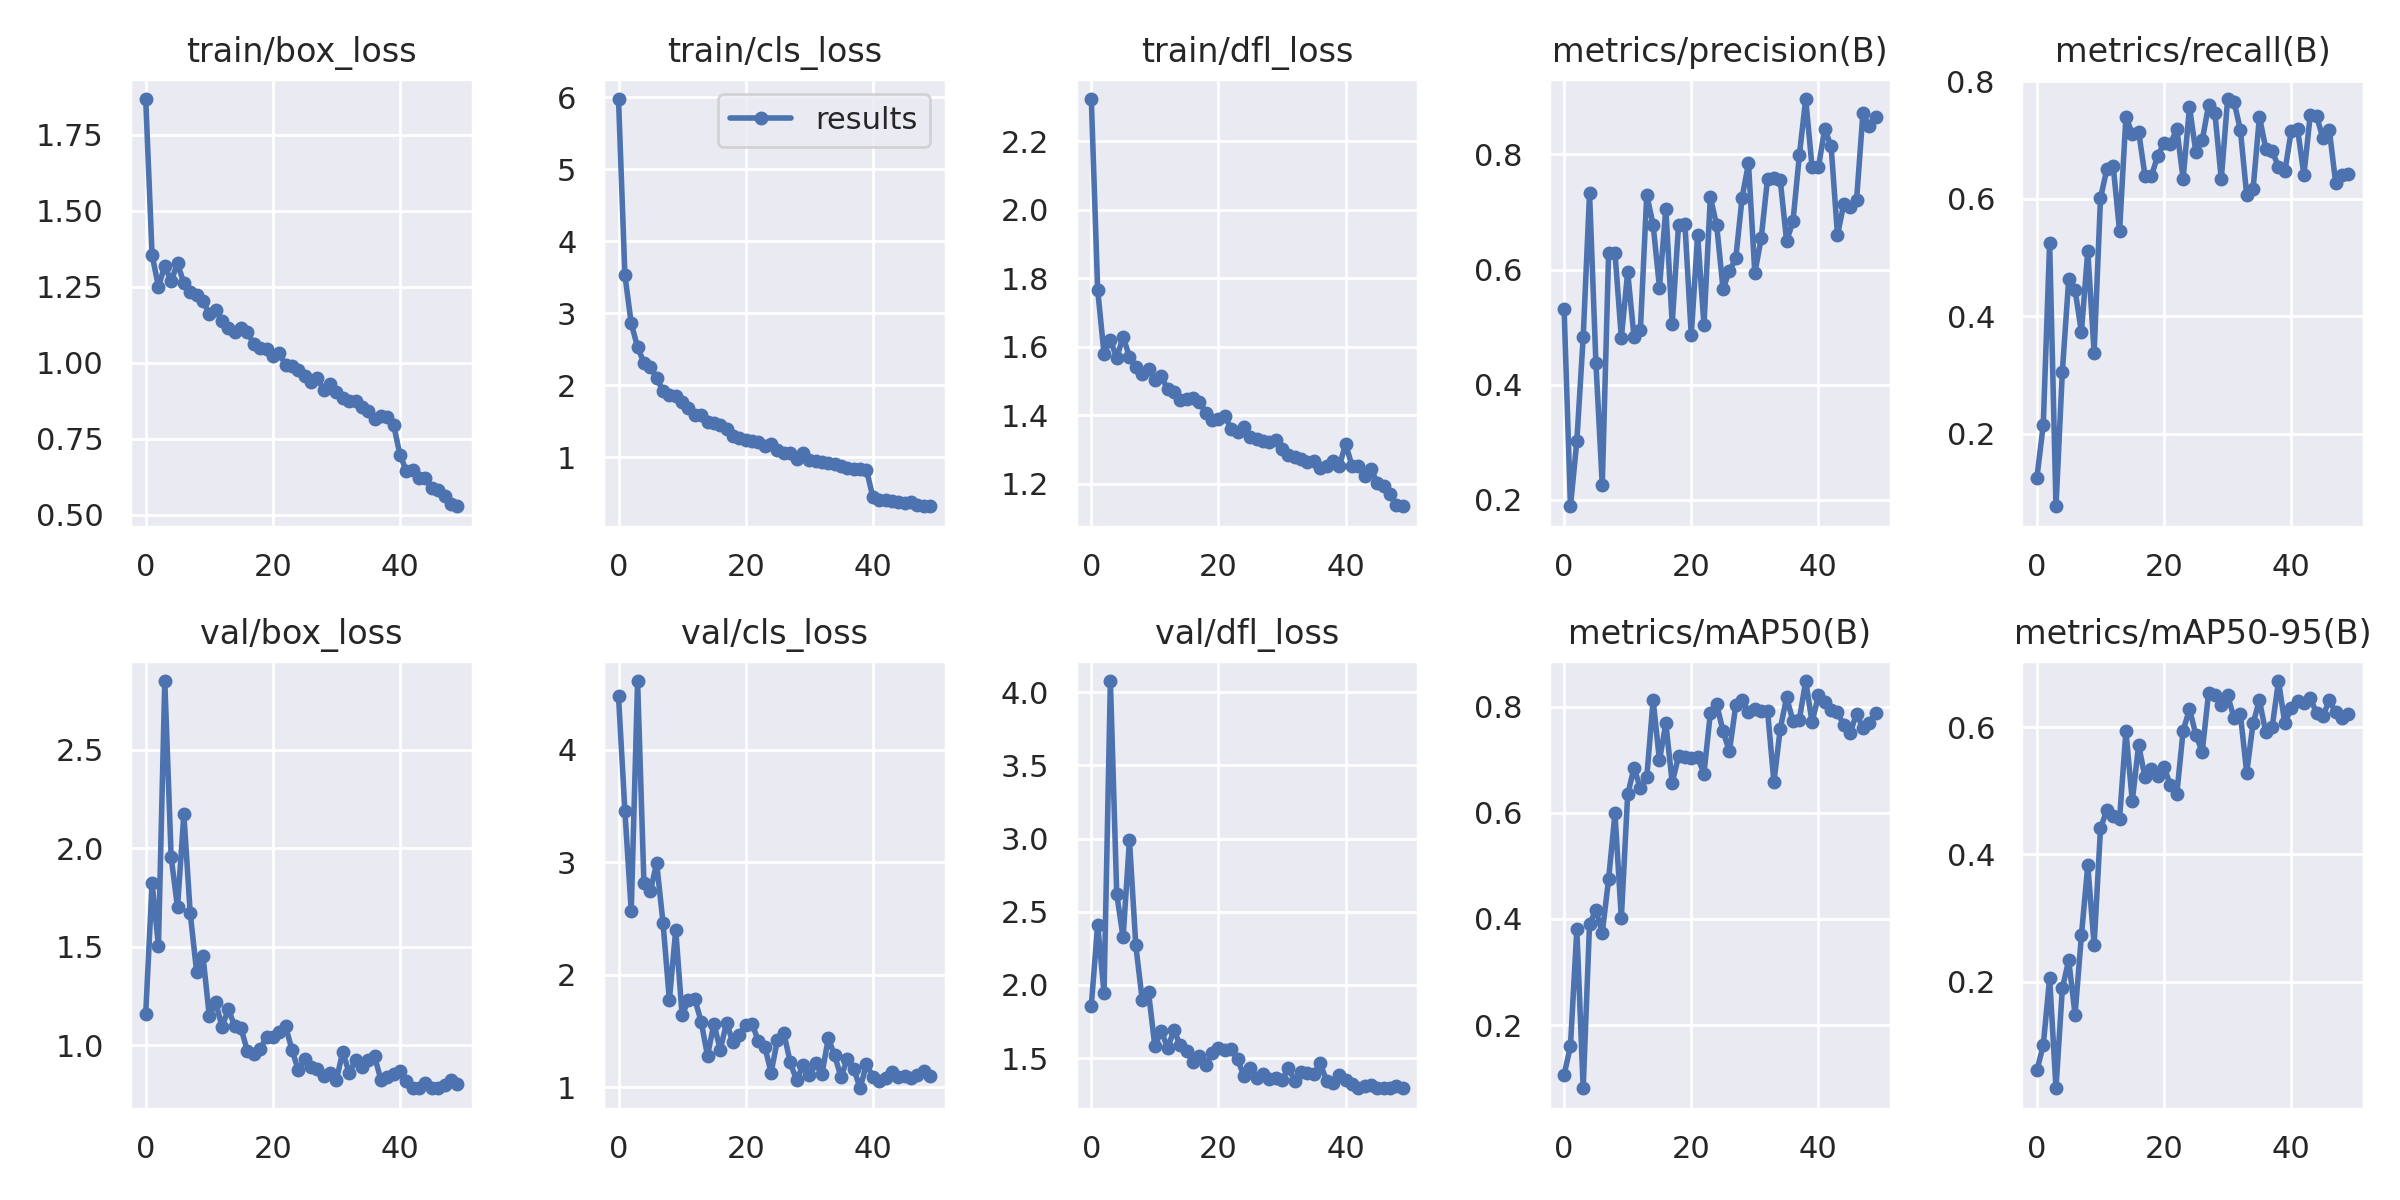

In [14]:
from IPython.display import Image, display
overall_results_plots = '/content/drive/MyDrive/Colab/YOLOv8_object_detection/training_results/signlanguage/results.png'
display(Image(filename=overall_results_plots))

### Findings
* The class loss is computed based on the cross-entropy loss for the confidence scores of each and every predicted bounding box. The box loss is computed as the mean squared error (MSE) between the predicted bounding box parameters and the ground truth ones. Distribution focal loss is a variant of focal loss that helps improve model performance when training data is imbalanced.
* Comparing the train and validation losses, we can see that in the earlier epochs, the model was mostly underfitting. Our recall scores seem to perform better than model precision as well.

## 3.3 Inferencing with trained weights

### Test Images
Let's run our model to perform object detection on our test images.

In [48]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Colab/YOLOv8_object_detection/training_results/signlanguage/weights/best.pt conf=0.35 source=/content/drive/MyDrive/Colab/YOLOv8_object_detection/data/test save=True

2023-09-05 16:50:39.078462: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 16:50:39.955703: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs
image 1/12 /content/drive/MyDrive/Colab/YOLOv8_object_detection/data/test/Actual Class: B.jpg: 640x640 1 B, 16.3ms
image 2/12 /content/drive/MyDrive/Colab/YOLOv8_object_detection/data/test/Actual Class: C (1).jpg: 480x640 1 C, 62.5ms
image 3/12 /content/drive/MyDrive/Colab/YOLOv8_object_detection/data/test/Actual Class: C (2).jpg: 480x640 1 C, 13.1ms
image 4/12 /content/drive/MyDrive/Colab/YOL

Note that results are saved to "runs/detect/predict", a temporary folder that contains the results of the inference, including the annotated images with bounding boxes drawn around detected objects.

Let's retrieve our resulting images and move them to our output folder:

In [46]:
!cp -r /content/runs/detect/predict3 /content/drive/MyDrive/Colab/YOLOv8_object_detection/output

Let's print 9 random predicted images from the test outputs:

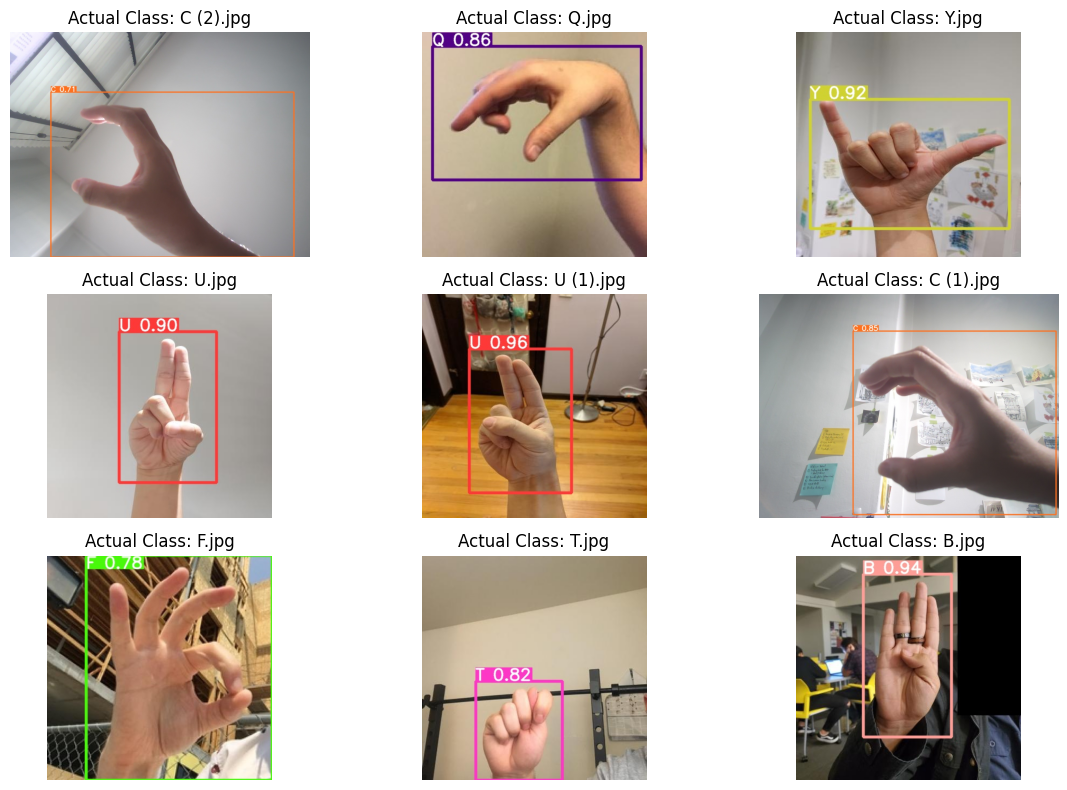

In [49]:
# Define the folder containing the images
folder_path = '/content/drive/MyDrive/Colab/YOLOv8_object_detection/output/predict_test'

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Randomly select 6 images
selected_images = random.sample(image_files, 9)

# Create a 2x3 grid to display the images
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

# Loop through the selected images and display them in the grid
for i, image_file in enumerate(selected_images):
    row = i // 3
    col = i % 3
    image_path = os.path.join(folder_path, image_file)
    image = imread(image_path)
    axes[row, col].imshow(image)
    axes[row, col].axis('off')
    axes[row, col].set_title(image_file)  # Set the title as the image name

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of images
plt.show()

### Findings
* We can see that the model was able to perform object detection on our images, and classify the alphabets effectively.
* Within this small sample alone, we can see that all alphabets were accurately classified with above 0.7 probability.

### Test Videos

Likewise, we run our model on 4 different videos to see the outcomes:

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Colab/YOLOv8_object_detection/training_results/signlanguage/weights/best.pt conf=0.35 source=/content/drive/MyDrive/Colab/YOLOv8_object_detection/data/videos save=True

2023-09-05 17:49:47.559319: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 17:49:48.773478: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs
video 1/4 (1/484) /content/drive/MyDrive/Colab/YOLOv8_object_detection/data/videos/WIN_20230906_01_18_24_Pro.mp4: 384x640 641.2ms
video 1/4 (2/484) /content/drive/MyDrive/Colab/YOLOv8_object_detection/data/videos/WIN_20230906_01_18_24_Pro.mp4: 384x640 613.5ms
video 1/4 (3/484) /content/drive/MyDrive/Colab/YOLOv8_object_detection/data/videos/WIN_20230906_01_18_24_Pro.mp4: 384x640 616.0ms
video 1/4 (4/484) /content/dri

In [ ]:
!cp -r /content/runs/detect/predict3 /content/drive/MyDrive/Colab/YOLOv8_object_detection/output

<img src="../images/vid1.gif" width="700"/> 

*Note that pixelated quality is due to conversion of video into a gif*

### Findings
* The above is the output of running our object detector on a video, with handsigns for letters "A, B, C, F".
* We can see that accuracy is high for each of the alphabets. On average, probability predicted for each of the signs are around 85%.
* We also note that the probabilities generally improve when we move our hand closer to the camera, as compared to being further away.

# 4. Summary of Model Performance

The below model parameters were used on the YOLO models:
* Epochs to train on: `50`
* Imgsz: `640`

<br>

Here is a summary of the YOLOv8s model results, along with earlier baseline YOLOv5s (not included in this notebook) results:

|Model No|Model Used|Precision|Recall|mAP50<br>mAP at IoU 50%|mAP50-95<br>mAP at IoU 50-95%|
|--|--|--|--|--|--|
|1|YOLOv5s|0.248 (Train)<br>0.333 (Test)|0.462 (Train)<br> 0.314 (Test)|0.367 (Train)<br> 0.274 (Test)|0.232 (Train)<br> 0.150 (Test)|
|2|**YOLOv8s**|0.896 (Train)<br>0.896 (Test)|0.655 (Train)<br> 0.656 (Test)|0.848 (Train)<br> 0.848 (Test)|0.673 (Train)<br> 0.673 (Test)|

<br>

* Although not mentioned in detail earlier, we tested the YOLOv5s as a separate experiment on a larger dataset of 1245 train images and 104 test images post-augmentation (unfortunately, the image dimensions of this dataset were incompatible with the YOLOv8 model, and hence could not be reused). Results seemed alot poorer, with train mAP50 being 0.367 and test mAP50 being 0.274. However, do note that this would not be a fair apple-to-apple comparisen to our YOLOv8 model, since the dataset used was of a different size and scale.
* The YOLOv8s seemed more reliable, of 0.848 for both train and test mAP50. When reviewing the inferences of the YOLOv8s model, the model performed consistently well in predicting both images and videos, with majority of the prediction probabilities being above 70%.
* The YOLOv8s model is to be taken as our baseline model, and used mainly as a proof-of-concept for basic object detection. For future stages of this project, with more time, we should definitely consider testing more accurate versions of the YOLOv8 models (e.g. YOLOv8m, YOLOv8l, YOLOv8x) and compare the computational time required for the various models.
* Further tests could also be done on the number of training epochs for the various models.

---

# 5. Conclusion
## 5.1 Summary

* In the pursuit of advancing accessibility and inclusivity, this project has taken steps towards bridging the communication gap for the Hard of Hearing (HoH) community. This capstone project succeeded in being a proof-of-concept (POC) to show us the potential that computer vision in sign language recognition could bring. In the initial phase of this multi-part project, we focused on Alphabet classification, exploring two approaches - Image classification and Object Detection.

* For Image Classification, using a dataset of 11700 train images, and 3120 test images, we carried out data augmentation via the imagedatagenerator to artifically expand our dataset during the model training process. 4 different transfer learning architectures were tested - VGG-16, InceptionV3, MobileNetV2, EfficientNetB0. Our evaluation metrics of Accuracy and Loss, have enabled comprehensive assessment of our model performance on our balanced dataset. Our top model, EfficientNetB0, has a training accuracy of 0.9612 and an cross-entropy loss of 0.1263, and a testing accuracy of 0.9314 and testing cross-entropy loss of 0.2434. It has the lowest loss amongst the models, and it has a reasonable average training time per epoch of around 500seconds. The problem statement highlighted the need for the model to fulfill the industry standard of 70% accuracy rate in order to be deemed successful. Our model has proven to surpass this, being able to accurately classify images to a commendable accuracy level.

* For Object Detection, using a smaller sample dataset of 630 train images, and 52 test images post-data augmentation, we decided to experiment with Single-Shot Learning models, namely the YOLO (You Only Look Once) algorithm. Between YOLOv5 and YOLOv8, YOLOv8s (we used the small version of the model) was more successful. The metrics of Mean Average Precision (mAP), Precision and Recall were used to assess model performance; YOLOv8s had very similar train and test scores for all metrics, indicating a well-balanced model. The model has a testing precision score of 0.896, recall score of 0.656, and mAP at IoU 50% was 0.848. When reviewing the inferences of the YOLOv8s model, the model performed consistently well in predicting both images and videos, with majority of the prediction probabilities being above 70%.


## 5.2 Limitations and Recommendations
For further improvements and development downstream, we would like to point out several potential limitations of the model as well as some recommendations:

**1) Data Availability<br>**
* For this capstone, we deemed the ASL dataset suitable for use in SgSL Alphabet Classification since SgSL was based off ASL fingerspelling, and is largely the same. However, there could be some slight nuances in local handsigning that may not have been captured. An example would be the letter 'T', where SgSl has an alternative modified version. 
* Moving into the next stage of the project of signing words and phrases, one of the primary limitations would be the availability of diverse and extensive sign language datasets, especially for less common sign languages like Singapore Sign Language (SgSL). 
* We would have to look into collaborating with sign language communities and organizations to collect and curate a more comprehensive dataset, ensuring representation of different signing styles, accents, and local variations. As of now, emails have been sent to the Singapore Association for the Deaf and NTU's SgSL Signbank on the request for data and possible collaborations.


**2) Computational Power, Time Constraints<br>**
* The constraints of computational power and time were the main limitations of model experimentation. For future development, with more time, other versions of the YOLOv8 models (e.g. YOLOv8m, YOLOv8l, YOLOv8x) should be tested to compare the computational time required for the various models and the tradeoff with model metrics scores. Model optimization techniques should be further explored to reduce computational requirements while maintaining accuracy.


**3) Ambiguity and Context <br>**
* Planning ahead to the next stage of the project, we will realise Sign language relies on contextual cues and facial expressions, introducing ambiguity. Recognizing nuanced meanings and emotional expressions can be challenging, and the unique linguistic structure of SgSL will have to be considered as well.
*  We will have to look into investigating methods to incorporate context and facial expression analysis into the recognition process. Develop models that can capture and interpret the subtleties of sign language communication.

In conclusion, the initial phase of our sign language recognition project has laid a solid foundation, demonstrating the potential of technology to bridge communication barriers for the Hard of Hearing (HoH) community. As we look ahead to the next stages, there is immense potential in creating meaning in every gesture, word, and phrase. By extending our focus from letter classification to word and phrase recognition, we are poised to create a comprehensive solution that empowers HoH individuals to communicate with ease and confidence in the digital age. 